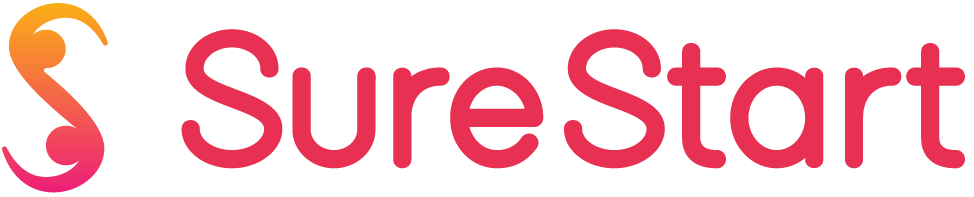

# Making AI Systems Smarter with RAG: Teaching AI to Use Your Knowledge

## Introduction
In this lesson, we're going to learn something really exciting—how to make AI systems smarter by teaching them to use specific information that we give them. Imagine you have a really smart friend who knows a lot about general topics but doesn't know specific details about your school. That's exactly how AI works right now! Let's learn how to fix this.

##🎯 Learning Goals
After this lesson, you will be able to:
1. Understand why AI sometimes gives wrong answers.
2. Learn what RAG is and how it helps make AI smarter.
3. Create your first RAG system in Google Colab.
4. Make AI answer questions using your own information.

In [25]:
!pip install transformers torch sentence-transformers chromadb --quiet

## What's Wrong with Regular AI?

Let's start with a simple experiment. We'll use an AI model to answer some questions:

**Note:** We're specifying a specific model below to avoid errors. If you get a warning about downloading the model, this is normal!

In [4]:
from transformers import pipeline
import torch

# Create our question-answering AI
qa_model = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")

print("✨ Success! We're ready to start!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu
✨ Success! We're ready to start!


Now, let's ask the AI some questions about a made-up school:

In [5]:
# Information about a fictional school
school_info = """
Central High School is located in downtown Manhattan. It was founded in 1995
by Dr. Maria Rodriguez. The school has 1,200 students and is known for its
excellent science program. The current principal is Mr. James Chen, who
started in 2022. The school colors are purple and gold.
"""

# Let's ask some questions
questions = [
    "Who is the principal of Central High School?",
    "When was the school founded?",
    "What are the school colors?"
]

print("📚 Let's test our AI's knowledge!\n")

for question in questions:
    result = qa_model(question=question, context=school_info)
    print(f"Question: {question}")
    print(f"Answer: {result['answer']}")
    print(f"Confidence: {result['score']:.2%}\n")

📚 Let's test our AI's knowledge!

Question: Who is the principal of Central High School?
Answer: Mr. James Chen
Confidence: 96.81%

Question: When was the school founded?
Answer: 1995
Confidence: 98.11%

Question: What are the school colors?
Answer: purple and gold
Confidence: 96.48%



The AI did pretty well here, right? That's because we gave it the information to work with, but watch what happens when we ask about your actual school:

In [6]:
# Now let's ask about your real school without giving the AI any context
real_questions = [
    "Who is the principal of my school?",
    "What are my school colors?",
    "When was my school founded?"
]

print("🏫 Now asking about my real school with no context:\n")

for question in real_questions:
    # Here we're providing an empty context—this will likely cause the AI to make something up
    # Or give a nonsensical answer because it has no information to work with
    result = qa_model(question=question, context=" ")
    print(f"Question: {question}")
    print(f"Answer: {result['answer']}")

🏫 Now asking about my real school with no context:

Question: Who is the principal of my school?
Answer: 
Question: What are my school colors?
Answer: 
Question: When was my school founded?
Answer: 


Let's understand why AI sometimes gives wrong answers:

1. **Limited Knowledge**: AI models are trained on general information but don't know specific details about your school, your town, or recent events.

2. **No Access to Real-Time Info**: The AI's knowledge is frozen in time from when it was trained. It doesn't automatically know about changes or new information.

3. **Making Things Up**: When AI doesn't know something but tries to answer anyway, it might generate false information. We call this "hallucination"—the AI is basically making things up!

In our example above, the AI had no information about your school, so it either tried to make something up or gave a nonsensical answer. This is like asking someone about a place they've never visited—they might just guess!


## Introducing RAG

RAG stands for Retrieval-Augmented Generation. Let's break this down:
- **Retrieval**: Finding the right information when needed.
- **Augmented**: Adding this information to what the AI already knows.
- **Generation**: Creating an answer using this combined knowledge.

Think of it like this:
- Regular AI is like a smart student who studied everything but wasn't in your school.
- RAG is like giving that student your school handbook to reference while answering questions.

Notice the difference? When we give the AI specific information:
1. It gives accurate answers instead of making things up.
2. It's more confident in its answers.
3. The answers are based on real facts, not guesses.

## ✏️ Task 1: Testing AI Knowledge

Now it's your turn to experiment! Your task is to:

1. Write down 5 facts about your school, including:
   - Your principal's name.
   - School colors.
   - A famous school event.
   - Something unique about your school.
   - A school tradition.

2. Create questions about these facts and test them with:

   a) No context (letting the AI guess).
   
   b) Your provided facts as context.

Use this code template:


In [0]:
# Write your school facts here
my_school_facts = """
[Write your 5 facts here]
"""

# Write 5 questions about your school
my_questions = [
    "Question 1?",
    "Question 2?",
    "Question 3?",
    "Question 4?",
    "Question 5?"
]


In [0]:
# Test without context
print("Testing without your school information:")
for question in my_questions:
    result = qa_model(question=question, context=" ")
    print(f"\nQ: {question}")
    print(f"A: {result['answer']}")
    print("(This answer is probably wrong!)")

In [0]:
# Test with context
print("Testing with your school information:")
for question in my_questions:
    result = qa_model(question=question, context=my_school_facts)
    print(f"\nQ: {question}")
    print(f"A: {result['answer']}")
    print(f"Confidence: {result['score']:.2%}")

Compare the answers and write down:
1. Which answers were completely wrong without context?
2. How did the answers improve with context?
3. Which answers was the AI most confident about?

# Building Our Knowledge Base: Understanding Document Storage

Now that we understand why AI needs access to specific information, an important question can arise:


> "Why can't we give our AI every single piece of information on the internet?"


LLMs are powerful tools, but they are limited by **context length**. This means they can only process a certain number of words at a time. Feeding them the entire world's information would be impractical, as they wouldn’t be able to analyze it all at once.


## Introduction to Knowledge Bases
Instead of giving an AI every single piece of information, let's learn how to create an organized collection of information that our AI can use. This collection is called a "knowledge base".

A knowledge base is like a digital library where we store important information that we want our AI to access. Just as a library organizes books by categories to make them easy to find, we need to organize our information in a way that computers can easily search through it.

In [7]:
import chromadb
from sentence_transformers import SentenceTransformer
import time

print("Setting up our digital library...")
print("✨ Ready to store knowledge!")

Setting up our digital library...
✨ Ready to store knowledge!


## Creating Our First Knowledge Base

Let's create a simple storage system for our information:

In [8]:
# Initialize our storage system
chroma_client = chromadb.Client()

# Create a collection (like creating a shelf in our library)
collection = chroma_client.create_collection(name="school_knowledge")

print("📚 Our digital library is ready!")

📚 Our digital library is ready!


## Understanding How to Store Information

When we store information in our knowledge base, each piece of information is like a file in a computer. Each file has:

1. **Contents**:The actual information we want to store.
2. **Name**:A unique name that helps us identify the file.

Let's add a document to our collection:

In [9]:
# Example of how to add a single piece of information
documents = [
    "The principal of Washington High School is Dr. Sarah Johnson."
]

# Adding the document to our collection
# Here "principal_info" is the name of our document (like a filename)
collection.add(
    documents=documents,
    ids=["principal_info"]
)

print("✅ Successfully stored our first piece of information!")

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:02<00:00, 30.9MiB/s]
✅ Successfully stored our first piece of information!


Let's add multiple pieces of information:

In [10]:
# Adding multiple facts at once
more_documents = [
    "The school cafeteria serves lunch from 11:30 AM to 1:00 PM.",
    "The school library is open Monday through Friday from 8:00 AM to 4:00 PM.",
    "Students must wear their ID badges at all times while on campus."
]

# Adding multiple documents with meaningful names
collection.add(
    documents=more_documents,
    ids=["cafeteria_hours", "library_hours", "id_policy"]  # Names for each document
)

print("✅ Successfully stored multiple facts!")

✅ Successfully stored multiple facts!


## Retrieving Information from the Knowledge Base

Storing information is only the first step. To make our knowledge base useful, we need to retrieve stored data efficiently.

Just like in a Python dictionary where you can retrieve a value using its key, we can retrieve a document from our collection using its name:


In [11]:
# Example of how to retrieve specific information by its name
retrieved_data = collection.get(ids=["principal_info"])

print("🔍 Here's the information we retrieved:")
for fact in retrieved_data["documents"]:
    print(fact)

🔍 Here's the information we retrieved:
The principal of Washington High School is Dr. Sarah Johnson.


You can also retrieve all documents if you want to review the entire collection:

In [12]:
# Retrieve all documents from the collection
all_documents = collection.get()

print("\n📂 Here's everything in our knowledge base:")
for i, doc in enumerate(all_documents['documents']):
    print(f"Document Name: {all_documents['ids'][i]}")
    print(f"Content: {doc}")
    print()


📂 Here's everything in our knowledge base:
Document Name: principal_info
Content: The principal of Washington High School is Dr. Sarah Johnson.

Document Name: cafeteria_hours
Content: The school cafeteria serves lunch from 11:30 AM to 1:00 PM.

Document Name: library_hours
Content: The school library is open Monday through Friday from 8:00 AM to 4:00 PM.

Document Name: id_policy
Content: Students must wear their ID badges at all times while on campus.



## Best Practices for Creating Information Chunks

When adding information to our knowledge base, we should follow these guidelines:

1. Make each piece of information clear and complete:

In [13]:
# Good example—detailed and complete information
good_fact = ["The school's Science Fair happens annually in March. Students present their projects in the main gymnasium, and winners receive scholarship opportunities."]

# Not as good of an example—too vague and incomplete
bad_fact = ["Science Fair in March"]

collection.add(
    documents=good_fact,
    ids=["science_fair_info"]  # Note how the name describes the content
)

2. Keep related information together:

In [14]:
# Good example—related information together with a descriptive name
sports_info = ["The basketball team practices every Monday and Wednesday from 3:30 PM to 5:30 PM in the main gymnasium. Coach Thompson leads the varsity team, while Coach Martinez leads the junior varsity team."]

collection.add(
    documents=sports_info,
    ids=["basketball_team_info"]  # Note how the name describes the content
)

# Building Our Knowledge Base: Making Information Searchable and Smart

## Understanding Vector Embeddings

Now that we know how to store information, let's make it searchable in a way that AI can understand. When we store information, we need to convert it into a format that helps the AI find relevant details quickly. This process is called "embedding".


Think of embeddings like giving each piece of information a special code that helps the AI understand what it's about. Let's set this up:

In [16]:
from chromadb.utils import embedding_functions

# Create the embedding function using ChromaDB's utilities
embedding_function = embedding_functions.SentenceTransformerEmbeddingFunction(
    model_name='all-MiniLM-L6-v2'
)

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Creating Smart Storage

Now let's create a more advanced storage system that uses these special codes:

In [17]:
# Create our collection with the proper embedding function
smart_collection = chroma_client.create_collection(
    name="smart_school_knowledge",
    embedding_function=embedding_function
)

print("✨ Successfully created our smart storage system!")

✨ Successfully created our smart storage system!


## Adding Information with Context

Let's store information in a way that makes it easy for the AI to understand relationships between different facts:

In [18]:
# Adding information about different aspects of school
school_documents = [
    """The main office is located in Building A, first floor. Principal Dr. Johnson's
    office is directly to the right of the entrance. The office staff includes
    Ms. Thompson (Secretary) and Mr. Rodriguez (Vice Principal).""",

    """The library is in Building B, second floor. It contains over 10,000 books
    and 30 computers for student use. The librarian, Ms. Chen, offers research
    assistance during school hours.""",

    """School counseling services are available in Building C. The counseling team
    includes Mrs. Garcia (Grades 9-10) and Mr. Park (Grades 11-12). Students can
    schedule appointments through the online portal or drop in during lunch hours."""
]

# Adding documents with meaningful IDs
smart_collection.add(
    documents=school_documents,
    ids=["admin_info", "library_info", "counseling_info"]
)

print("Successfully stored detailed school information!")

Successfully stored detailed school information!


## Testing Our Smart Storage

Let's see how our system finds relevant information:

In [19]:
# Let's search for information about the library
query = "What are the library's resources?"

# Search our collection
results = smart_collection.query(
    query_texts=[query],
    n_results=1
)

print("\nQuery:", query)
print("\nRelevant Information Found:")
print(results['documents'][0][0])


Query: What are the library's resources?

Relevant Information Found:
The library is in Building B, second floor. It contains over 10,000 books
    and 30 computers for student use. The librarian, Ms. Chen, offers research
    assistance during school hours.


This is amazing! Notice that we didn't provide a specific document name like "library_info". We just asked a question in natural language, and the system found the relevant document.

This works because our embedding function converts both our documents and our question into that special code (vector embeddings) that captures meaning; then it finds the document whose meaning is closest to our question.

Let's try another example:


In [20]:
# Try another search
query = "How can students meet with counselors?"
results = smart_collection.query(
    query_texts=[query],
    n_results=1
)

print("\nQuery:", query)
print("\nRelevant Information Found:")
print(results['documents'][0][0])


Query: How can students meet with counselors?

Relevant Information Found:
School counseling services are available in Building C. The counseling team
    includes Mrs. Garcia (Grades 9-10) and Mr. Park (Grades 11-12). Students can
    schedule appointments through the online portal or drop in during lunch hours.


Again, we didn't need to know the document name ("counseling_info"). We just asked a natural question, and the system found the most relevant document. This is the power of semantic search with vector embeddings!

## ✏️ Task 2: Building a Comprehensive School Knowledge Base

Now it's time to create a complete knowledge base about your school. This task will help you understand how to organize and store information effectively.

Create detailed descriptions for at least 5 different aspects of your school:
   - Administrative information
   - Academic programs
   - Extracurricular activities
   - School facilities
   - Important policies

Remember:
- Make each description detailed and specific.
- Include names, locations, and important details.
- Think about what questions students might ask about each topic.

In [0]:
# Start Code
import chromadb
from chromadb.utils import embedding_functions

# Initialize the client and embedding function
chroma_client = chromadb.Client()
embedding_function = embedding_functions.SentenceTransformerEmbeddingFunction(
    model_name='all-MiniLM-L6-v2'
)

# Create a collection for your school knowledge
school_collection = chroma_client.create_collection(
    name="my_school_knowledge",
    embedding_function=embedding_function
)

# TODO: Create detailed descriptions for different aspects of your school
# Here's an example structure to follow:

administrative_info = """
Input Text Here
"""

academic_programs = """
Input Text Here
"""

extracurricular_activities = """
Input Text Here
"""

school_facilities = """
Input Text Here
"""


# Add your descriptions to the collection
### BEGIN SOLUTION
school_collection.add(
    documents=[
        administrative_info,
        academic_programs,
        extracurricular_activities,
        school_facilities
    ],
    ids=[
        "admin_info",
        "academic_info",
        "activities_info",
        "facilities_info"
    ]
)
### END SOLUTION


# Test your knowledge base
# Example query to test:
test_query = "What are the school's office hours?"
results = school_collection.query(
    query_texts=[test_query],
    n_results=1
)

# Print the results
print(f"\nQuery: {test_query}")
print("Retrieved Information:")
print(results['documents'][0][0])

## Understanding Search Limitations and the Need for Intelligent Question Answering

Let's examine what our current knowledge base can and cannot do:

Our current search capability returns entire documents that are relevant to a question, but it has several limitations:

1. **Whole Document Responses**: The system returns entire chunks of stored text rather than specific answers. For example, if you ask "What time does the library open?", it returns the complete library description instead of just the opening hours.

2. **No Information Synthesis**: If information is spread across multiple entries, our current system cannot combine them into a single coherent answer.

3. **Limited Question Understanding**: The system performs semantic matching but doesn't truly understand the specific information being requested.

## Enhancing Our System with Intelligent Question Answering

To overcome these limitations, we'll combine our knowledge base with a language model specifically designed for question answering; this combination will allow our system to:

1. Extract precise answers from retrieved context.
2. Combine information from multiple sources.
3. Provide natural, conversational responses.
4. Handle complex questions that require reasoning.

This is the full RAG (Retrieval-Augmented Generation) system in action!

# Combining RAG with Question-Answering: Building on Our Knowledge Base

In this section, we'll integrate our established knowledge base with a question-answering system to create a comprehensive school information system.

## Setting Up the Question-Answering Component

We already have our question-answering model set up from earlier.


In [0]:
# qa_model = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")

## Creating Our Integrated School Information System

Now we'll build a function that combines our existing knowledge base with question-answering capabilities:

In [22]:
def school_information_system(question, smart_collection):
    """
    Provides detailed answers about school information using our existing knowledge base.
    """
    # Retrieve relevant information from our knowledge base
    search_results = smart_collection.query(
        query_texts=[question],
        n_results=2  # Retrieve the top 2 most relevant pieces of information
    )

    # Combine the retrieved information
    context = " ".join(search_results['documents'][0])

    # Generate a specific answer using our question-answering model
    answer = qa_model(question=question, context=context)

    return {
        "answer": answer['answer'],
        "confidence": answer['score'],
        "full_context": context
    }

In [23]:
# Let's test our system with some questions
test_questions = [
    "What are the rules for using school facilities?",
    "Where can I find important administrative information?",
    "What are the hours for student services?"
]

In [24]:
print("\nTesting our integrated information system:")
for question in test_questions:
    result = school_information_system(question, smart_collection)
    print(f"\nQuestion: {question}")
    print(f"Answer: {result['answer']}")
    print(f"Confidence Level: {result['confidence']:.2%}")


Testing our integrated information system:

Question: What are the rules for using school facilities?
Answer: Students can
    schedule appointments through the online portal or drop in during lunch hours
Confidence Level: 40.35%

Question: Where can I find important administrative information?
Answer: Building B
Confidence Level: 14.81%

Question: What are the hours for student services?
Answer: lunch hours
Confidence Level: 54.08%


# Task 3: Creating Your School's Club Information System

## Overview
In this task, you will develop an AI-powered information system to help students learn about and find clubs at your school. This project brings together the concepts of RAG (Retrieval-Augmented Generation) and question-answering in a practical application.

## Learning Objectives
Through this task, you will demonstrate your understanding of:
- Building and organizing a knowledge base with real-world information.
- Implementing a RAG system for specific use cases.
- Creating natural language interfaces for information retrieval.
- Designing AI systems that solve practical problems.

## Project Requirements
Your club information system should accomplish the following:

1. Store detailed information about at least three school clubs, including:
   - Meeting times and locations.
   - Club leaders and advisors.
   - Activities and events.
   - Membership requirements.
   - Special achievements or upcoming events.

2. Answer various types of questions about clubs:
   - Basic inquiries (meeting times, locations).
   - Complex questions (activity details, requirements).
   - Cross-club comparisons.

3. Help students find clubs based on their interests.


In Task 3, you'll create your own club information system.
Here's a template to get you started:

First, create a collection for your clubs.

In [0]:
!pip install transformers torch sentence-transformers chromadb --quiet

import chromadb
from chromadb.utils import embedding_functions
from transformers import pipeline

# Initialize the components: chroma_client, embedding_function, qa_model

### BEGIN SOLUTION
chroma_client = chromadb.Client()
embedding_function = embedding_functions.SentenceTransformerEmbeddingFunction(
    model_name='all-MiniLM-L6-v2'
)
qa_model = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")
### END SOLUTION

In [0]:
# Create your clubs_collection
### BEGIN SOLUTION
clubs_collection = chroma_client.create_collection(
    name="school_clubs_new",
    embedding_function=embedding_function
)
### END SOLUTION

In [0]:
#Add Your Club Information
# Add detailed information for at least 3 clubs at your school
# Example format:
example_club = """
[Category: Example Category]
Club name and basic details...
Meeting times and location...
Club leaders and advisor information...
Activities and requirements...
Special events or achievements...
"""

In [0]:
# Your code here—create variables for your club information
club_1 = """
[Add your first club's information here]
"""

club_2 = """
[Add your second club's information here]
"""

club_3 = """
[Add your third club's information here]



In [0]:
# Example of adding clubs to the collection (uncomment and fill in when ready)
# clubs_collection.add(
#     documents=[club_1, club_2, club_3],
#     ids=["club1_name", "club2_name", "club3_name"],
#     metadatas=[
#         {"categories": "category1,category2"},
#         {"categories": "category3,category4"},
#         {"categories": "category5,category6"}
#     ]
# )

In [0]:
# Create Your Club Assistant
def club_assistant(question):
    """
    create a function that:
    1. Gets relevant information from the collection
    2. Uses the QA model to generate a specific answer
    3. Returns the answer and confidence score
    """
    ### BEGIN SOLUTION
    search_results = clubs_collection.query(
        query_texts=[question],
        n_results=2
    )

    # Use combined context for better answers
    context = " ".join(search_results['documents'][0])
    answer = qa_model(question=question, context=context)

    return {
        "answer": answer['answer'],
        "confidence": answer['score'],
        "source": search_results['ids'][0][0]
    }
    ### END SOLUTION

In [0]:
# Create Interest-Based Recommendations
def find_clubs_by_interest(interest):
    """
    create a function that:
    1. Searches for clubs matching the given interest
    2. Returns relevant clubs and their descriptions
    """
    ### BEGIN SOLUTION
    results = clubs_collection.query(
        query_texts=[f"clubs related to {interest}"],
        n_results=3
    )

    matched_clubs = []
    for i, club in enumerate(results['documents'][0]):
        # Extract categories from the first line of club description
        categories = club.split('\n')[0].replace('[Category: ', '').replace(']', '')

        club_summary = {
            "club_name": results['ids'][0][i],
            "categories": categories,
            "description": '\n'.join(club.split('\n')[1:4]),  # First three lines of description
            "relevance_score": 1 - results['distances'][0][i]  # Convert distance to similarity score
        }
        matched_clubs.append(club_summary)

    return matched_clubs
    ### END SOLUTION

In [0]:
# Add test questions here to verify your system works
test_questions = [
    "When does the [club name] meet?",
    "What activities does [club name] offer?",
    "Which clubs have competitions?"
]

In [0]:
# Test your system
### BEGIN SOLUTION
for question in test_questions:
    result = club_assistant(question)
    print(f"\nQuestion: {question}")
    print(f"Answer: {result['answer']}")
    print(f"Confidence: {result['confidence']:.2%}")
    print(f"Source: {result['source']}")


print("\nTesting Interest-Based Recommendations:")
print("-" * 50)

test_interests = ["science", "arts", "community service"]
for interest in test_interests:
    print(f"\nFinding clubs related to: {interest}")
    matches = find_clubs_by_interest(interest)
    for club in matches:
        print(f"\nClub: {club['club_name']}")
        print(f"Categories: {club['categories']}")
        print(f"Description:\n{club['description']}")
        print(f"Relevance Score: {club['relevance_score']:.2%}")
### END SOLUTION